### 1. Задача медицинской диагностики - классификация по 2 классам. 
Если target == 0, нет подозрений на сердечные недуги,
если target == 1, есть.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('heart.csv')
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Признаки:
1) age - возраст
2) sex - пол
3) cp - chest pain - тип боли в груди (4 типа)
4) trestbps - resting blood pressure - кровяное давление в покое
5) chol - serum cholesterol - сывороточный холестерин
6) fbs - fasting blood sugar - уровень сахара в крови натощак (>120 mg/dl)
7) restecg - resting ecg results - результаты ЭКГ в покое
8) thalach - maximum heart rate achieved - максимальная частота сердечных сокращений
9) exang - exercise induced angina - стенокардия при физ. нагрузках
10) oldpeak - ST depression induced by exercise ST segment - депрессия сегмента ST
11) slope - the slope of the peak exercise ST segment - наклон пика сегмента ST
12) ca - number of major vessels colored by flourosopy  - количество больших сосудов, окрашенных при рентгеноскопии (0-3)
13) thal - 0: normal, 1: fixed defect, 2: reversable defect

More: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### 2. EDA, визуальный анализ

In [2]:
binary = ['sex','fbs','exang']
categorial = ['cp', 'restecg', 'slope', 'ca', 'thal' ]
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data.isnull().sum() # Mmm, nice :^)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dfalive = data[data['target'] == 1]
dfdead = data[data['target'] == 0]

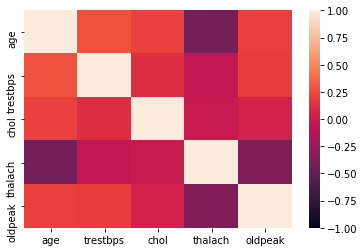

In [8]:
corr_matrix = data[numeric].corr()
sns.heatmap(corr_matrix, vmin = -1, vmax = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F1672BE48>,
      dtype=object)

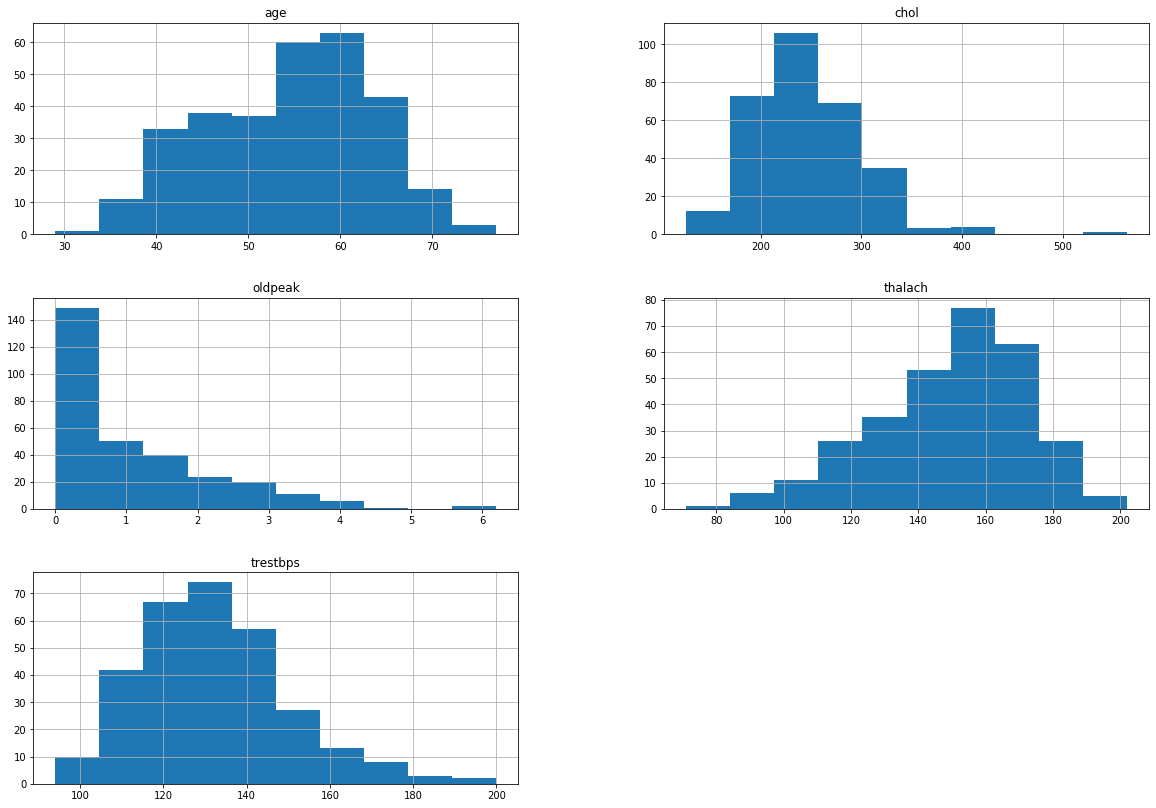

In [9]:
data[numeric].hist(figsize = (20, 14))

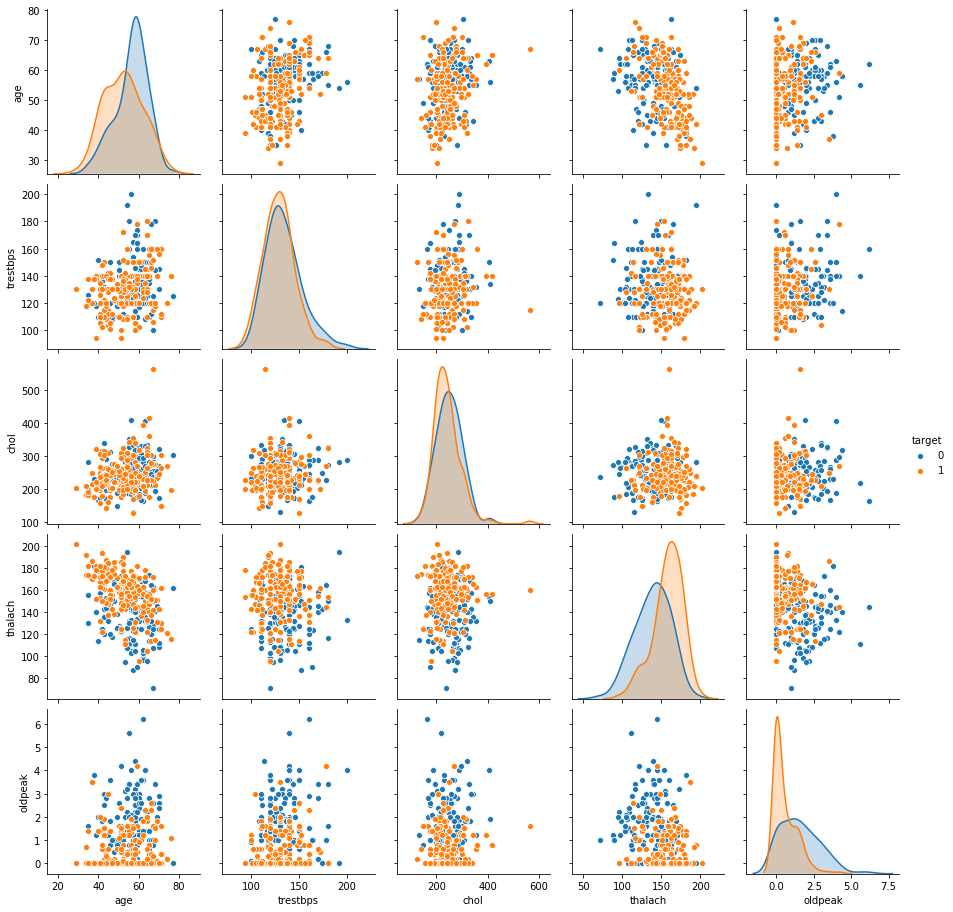

In [10]:
sns.pairplot(data[numeric + ['target']], hue = 'target')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


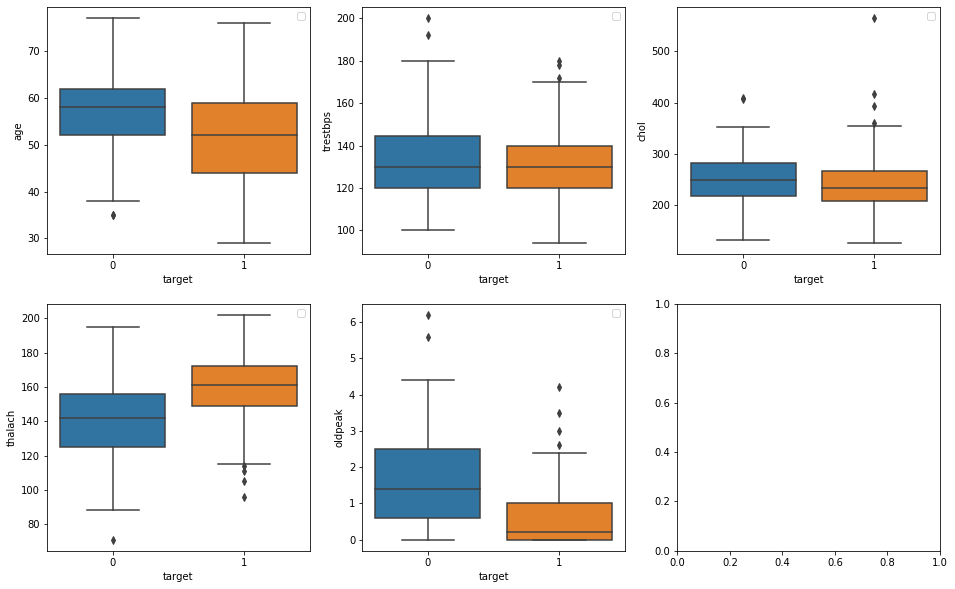

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, feat in enumerate(numeric):
    sns.boxplot(x='target', y=feat, data=data, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].legend()
    axes[idx // 3, idx % 3].set_xlabel('target')
    axes[idx // 3, idx % 3].set_ylabel(feat);

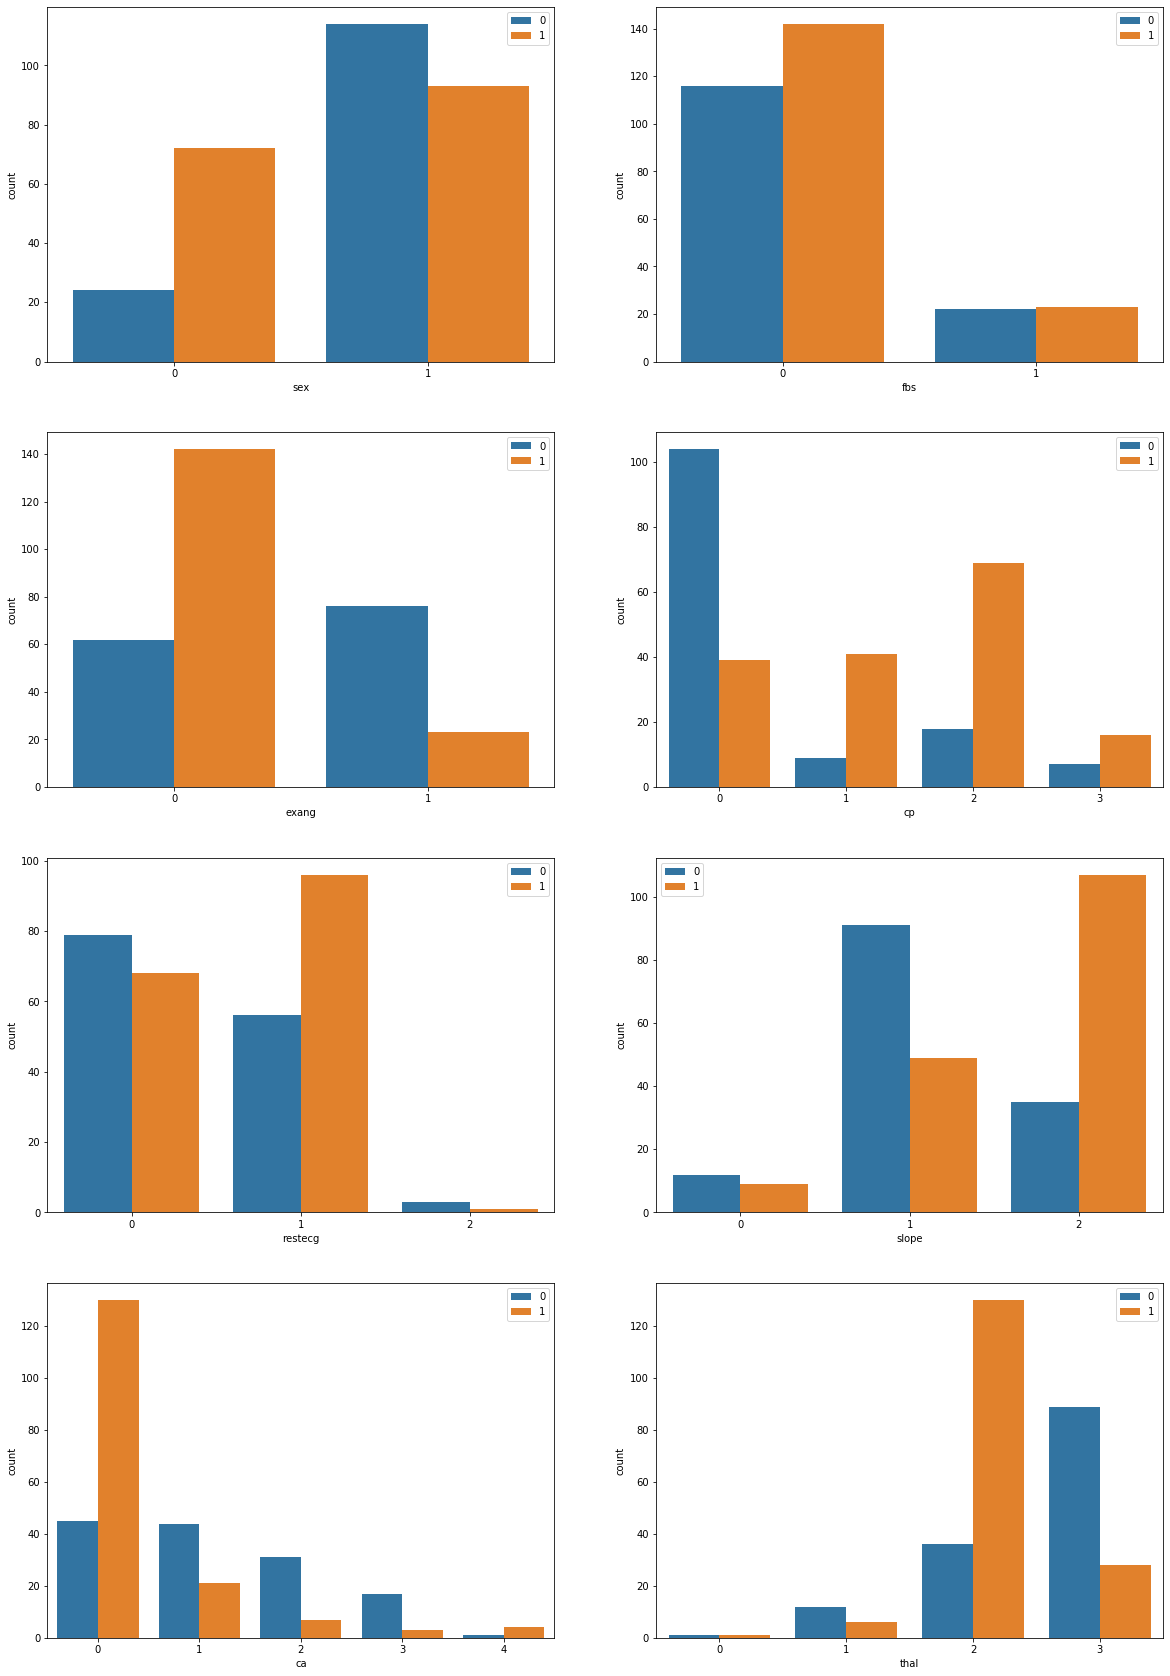

In [12]:
fig1, axes1 = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 30))
for idx, feat in enumerate(binary + categorial):
    sns.countplot(x=feat, hue='target', data=data, ax = axes1[idx // 2, idx % 2])
    axes1[idx // 2, idx % 2].legend()
    axes1[idx // 2, idx % 2].set_xlabel(feat)
    axes1[idx // 2, idx % 2].set_ylabel('count');

#### Некоторые выводы и наблюдения:
##### 1) из pairplot следует, что SVM - не лучшая модель для данной задачи (в том числе и его нелинейные обобщения); !!!!!!!!!!!!!!!!!!!!!!!!!!!! не факт
##### 2) trestbps: из рисунка ниже следует, что признак, вероятно, не информативен, аналогичные выводы можно получить для признаков chol и fbs;
##### 3) ca == 0 => доля больных гораздо больше, вероятно признак "сильный";
##### 4) сильных корреляций между числовыми признаками не наблюдается;

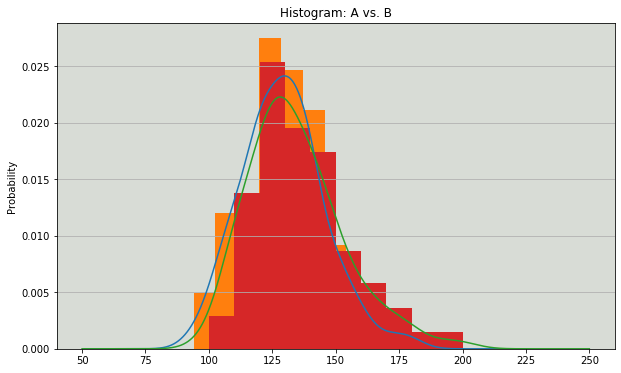

In [13]:
fig2, ax2 = plt.subplots(figsize = (10,6))
dfalive['trestbps'].plot.kde(ax=ax2, legend=False, title='Histogram: A vs. B')
dfalive['trestbps'].plot.hist(density=True, ax=ax2)
dfdead['trestbps'].plot.kde(ax=ax2, legend=False, title='Histogram: A vs. B')
dfdead['trestbps'].plot.hist(density=True, ax=ax2)
ax2.set_ylabel('Probability')
ax2.grid(axis='y')
ax2.set_facecolor('#d8dcd6')

### 3. О используемых метриках:
#### 1) Accuracy. Интуитивно самая понятная;
#### 2) Recall. В данной задаче Recall важнее Precision - сделать несколько доп. тестов и понять, что больной здоров, менее "страшно", чем пропустить больного;
#### 3) Precision. Тем не менее, не хочется делать мильон тестов для каждого :^)
#### 3) F-мера для усреднения Recall и Precision;
#### 4) Хоть и не наблюдается сильного дисбаланса классов, используем AUC-ROC, обладающую следующей интерпретацией: AUC-ROC = P(объект класса 1 получит оценку вероятности принадлежности к классу 1 выше, чем объект класса 0).

### 4. О выбранных моделях
#### 1) Логистическая регрессия. Выбор данной модели обусловлен её способностью получать оценки принадлежности объектов к классам;
#### 2) Бэггинг и случайный лес. Является одним из самых эффективных алгоритмов машинного обучения;
#### 3) Градиентный бустинг над случайным лесом. Обычно работает лучше, чем случайный лес.

### 5. О признаках и алгоритме решения: 
####     1) закодируем все категориальные признаки с помощью one-hot кодирования;
####     2) осуществим обучение моделей на всём полученном датасете, подберем гиперпараметры, оценим модели;
####     3) а зачем все усложнять? Повторим пункт 2 без категориальных признаков;
####     4) для возможного улучшения качества модели с помощью SelectKBest для разных K и разных score_func = {mutual_info_classif, chi2, f_classif} упростим признаковое описание и повторим п. 2.

In [129]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

metrics = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
gensplit = KFold(n_splits=5, shuffle=True, random_state=42)



##### One-hot кодирование

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')
X = data[categorial]
enc.fit(X)
xTr = pd.DataFrame(enc.transform(X).toarray()) # np.shape(xTr) = 303, 19
newdata = data.drop(columns = categorial)
newdata = pd.concat([newdata, xTr], axis = 1)
newdata = newdata.drop(columns = 'target')
X_train, X_test, y_train, y_test = train_test_split(newdata, data['target'], test_size=0.33)

In [16]:
#enc.get_feature_names()

In [93]:
gridLog = {'C': np.linspace(0.01, 5, 50)}
gridRF =  {'n_estimators': range(50, 351, 5) }
gridGB =  {'n_estimators': range(50, 351, 10) , 'learning_rate': np.linspace(0.001, 2, 8)}


## Логистическая регрессия

In [67]:
lrclf = LogisticRegression(max_iter = 10000)

In [71]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(lrclf, gridLog, scoring=metric, cv=gensplit)
    gs.fit(X_train, y_train)
    print(metric, ':',  np.mean(cross_val_score(LogisticRegression(max_iter = 10000, C = gs.best_params_['C']) , 
                                                X_test, y_test, cv=gensplit, scoring=metric)), '|',  gs.best_params_ )

Оценки на отложенных данных
accuracy : 0.78 | {'C': 0.31551020408163266}
recall : 0.8527080762374879 | {'C': 0.31551020408163266}
precision : 0.7930952380952381 | {'C': 0.2136734693877551}
f1 : 0.8274210330732069 | {'C': 0.31551020408163266}
roc_auc : 0.8323603275809159 | {'C': 2.963265306122449}


In [75]:
bestlr = LogisticRegression(max_iter = 10000, C = 0.31551020408163266).fit(X_train, y_train)
for metric in metrics:
    print(metric, ':',  np.mean(cross_val_score(bestlr, X_test, y_test, cv=gensplit, scoring = metric)))

accuracy : 0.78
recall : 0.8527080762374879
precision : 0.8194472194472194
f1 : 0.8274210330732069
roc_auc : 0.8418149660796719


## Случайный лес (with bootstrap)

In [76]:
RF = ExtraTreesClassifier(bootstrap=True)

In [77]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(RF, gridRF, scoring=metric, cv=gensplit)
    gs.fit(X_train, y_train)
    print(metric, ':',  
          np.mean(cross_val_score(ExtraTreesClassifier(bootstrap = True, n_estimators = gs.best_params_['n_estimators']),
                                  X_test, y_test, cv=gensplit, scoring=metric)), '|:', gs.best_params_)

Оценки на отложенных данных
accuracy : 0.8099999999999999 |: {'n_estimators': 125}
recall : 0.8629576306046894 |: {'n_estimators': 125}
precision : 0.8495238095238096 |: {'n_estimators': 71}
f1 : 0.842115246760408 |: {'n_estimators': 263}
roc_auc : 0.8601304741010622 |: {'n_estimators': 290}


In [98]:
bestRF = ExtraTreesClassifier(bootstrap=True, n_estimators=125)
for metric in metrics:
    print(metric, ':',  np.mean(cross_val_score(bestlr, X_test, y_test, cv=gensplit, scoring = metric)))

accuracy : 0.78
recall : 0.8527080762374879
precision : 0.8194472194472194
f1 : 0.8274210330732069
roc_auc : 0.8418149660796719


## Градиентный бустинг над случайным лесом

In [19]:
GBclf = GradientBoostingClassifier()

In [99]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(GBclf, gridGB, scoring=metric, cv=gensplit)
    gs.fit(X_train, y_train)
    print(metric, ':',  
          np.mean(cross_val_score(GradientBoostingClassifier(n_estimators=gs.best_params_['n_estimators'],
                                                             learning_rate=gs.best_params_['learning_rate']), 
                                                X_test, y_test, cv=gensplit, scoring=metric)), 
          '|', 
          gs.best_params_)

Оценки на отложенных данных
accuracy : 0.74 | {'learning_rate': 0.2865714285714286, 'n_estimators': 130}
recall : 0.9882352941176471 | {'learning_rate': 0.001, 'n_estimators': 190}


C:\Users\MSI1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision : 0.7918498168498168 | {'learning_rate': 0.2865714285714286, 'n_estimators': 340}
f1 : 0.7892962962962964 | {'learning_rate': 0.2865714285714286, 'n_estimators': 120}
roc_auc : 0.7855035487388429 | {'learning_rate': 0.2865714285714286, 'n_estimators': 60}


In [100]:
bestGB = GradientBoostingClassifier(n_estimators=190, learning_rate=0.001)
for metric in metrics:
    print(metric, ':',  np.mean(cross_val_score(bestlr, X_test, y_test, cv=gensplit, scoring = metric)))

accuracy : 0.78
recall : 0.8527080762374879
precision : 0.8194472194472194
f1 : 0.8274210330732069
roc_auc : 0.8418149660796719


## Осуществим то же самое, удалив из данных категориальные признаки

In [114]:
lrclf = LogisticRegression(max_iter = 10000)
RF = ExtraTreesClassifier(bootstrap=True)
GBclf = GradientBoostingClassifier()


X_train1, X_test1, y_train1, y_test1 = train_test_split(data.drop(columns = categorial + ['target']), data['target'], test_size=0.33)


### Логистическая регрессия

In [115]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(lrclf, gridLog, scoring=metric, cv=gensplit)
    gs.fit(X_train1, y_train1)
    print(metric, ':',  np.mean(cross_val_score(LogisticRegression(max_iter = 10000, C = gs.best_params_['C']) , 
                                                X_test1, y_test1, cv=gensplit, scoring=metric)), '|',  gs.best_params_ )





Оценки на отложенных данных
accuracy : 0.8 | {'C': 0.31551020408163266}
recall : 0.8287545787545788 | {'C': 0.2136734693877551}
precision : 0.7915251415251415 | {'C': 0.31551020408163266}
f1 : 0.7903418803418804 | {'C': 0.2136734693877551}
roc_auc : 0.8510760073260073 | {'C': 1.2320408163265306}


### Случайный лес

In [117]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(RF, gridRF, scoring=metric, cv=gensplit)
    gs.fit(X_train1, y_train1)
    print(metric, ':',  
          np.mean(cross_val_score(ExtraTreesClassifier(bootstrap = True, n_estimators = gs.best_params_['n_estimators']),
                                  X_test1, y_test1, cv=gensplit, scoring=metric)), '|:', gs.best_params_)


Оценки на отложенных данных
accuracy : 0.74 |: {'n_estimators': 205}
recall : 0.8384615384615385 |: {'n_estimators': 165}
precision : 0.764065934065934 |: {'n_estimators': 60}
f1 : 0.769146853146853 |: {'n_estimators': 230}
roc_auc : 0.8375572344322345 |: {'n_estimators': 160}


### Бустинг

In [119]:
print('Оценки на отложенных данных')
for metric in metrics:
    gs = GridSearchCV(GBclf, gridGB, scoring=metric, cv=gensplit)
    gs.fit(X_train1, y_train1)
    print(metric, ':',  
          np.mean(cross_val_score(GradientBoostingClassifier(n_estimators=gs.best_params_['n_estimators'],
                                                             learning_rate=gs.best_params_['learning_rate']), 
                                                X_test1, y_test1, cv=gensplit, scoring=metric)), 
          '|', 
          gs.best_params_)

Оценки на отложенных данных
accuracy : 0.75 | {'learning_rate': 1.4288571428571428, 'n_estimators': 230}
recall : 1.0 | {'learning_rate': 0.001, 'n_estimators': 50}
precision : 0.7484848484848485 | {'learning_rate': 2.0, 'n_estimators': 130}
f1 : 0.7135424575424574 | {'learning_rate': 0.001, 'n_estimators': 310}
roc_auc : 0.7189445970695971 | {'learning_rate': 0.001, 'n_estimators': 340}


### Метрики ухудшаются, очевидно, что происходит потеря важной информации. Используем RandomForest классификатор, найденный выше, рассмотрим важности признаков.

In [128]:
bestRF = ExtraTreesClassifier(bootstrap=True, n_estimators=125).fit(X_train, y_train)
np.sort(bestRF.feature_importances_)

array([0.        , 0.00117858, 0.00183508, 0.00799767, 0.00857318,
       0.00883499, 0.0125949 , 0.01505425, 0.01623285, 0.0205932 ,
       0.02289969, 0.0237581 , 0.02455924, 0.03446806, 0.03511987,
       0.03525943, 0.03615554, 0.04085402, 0.04980128, 0.0529218 ,
       0.05438853, 0.05669479, 0.06392661, 0.06501703, 0.0934321 ,
       0.09945727, 0.11839192])

### Попробуем улучшить качество классификации, выбрав 14 (важность > 0.03) лучших признаков с помощью SelectKBest.

In [134]:
score_funcs = [chi2, f_classif, mutual_info_classif]

gridLog = {'C': np.linspace(0.01, 5, 50)}
gridRF =  {'n_estimators': range(50, 351, 5) }
gridGB =  {'n_estimators': range(50, 351, 10) , 'learning_rate': np.linspace(0.001, 2, 8)}

lrclf = LogisticRegression(max_iter = 10000)
RF = ExtraTreesClassifier(bootstrap=True)
GBclf = GradientBoostingClassifier()

### Логистическая регрессия

In [137]:
print('Оценки на отложенных данных')
for score_func in score_funcs:
    print('========================================')
    print('score_func:', score_func)
    print('========================================')
    X_kBest = SelectKBest(score_func, k=14).fit_transform(newdata, data['target'])
    X_train, X_test, y_train, y_test = train_test_split(X_kBest, data['target'], test_size=0.33)
    for metric in metrics:
        gs = GridSearchCV(lrclf, gridLog, scoring=metric, cv=gensplit)
        gs.fit(X_train, y_train)
        print(metric, ':',  np.mean(cross_val_score(LogisticRegression(max_iter = 10000, C = gs.best_params_['C']) , 
                                                X_test, y_test, cv=gensplit, scoring=metric)), '|',  gs.best_params_ )
    print()

Оценки на отложенных данных
score_func: <function chi2 at 0x0000020F199DA0D8>
accuracy : 0.78 | {'C': 0.31551020408163266}
recall : 0.7854545454545455 | {'C': 2.963265306122449}
precision : 0.8104506604506604 | {'C': 0.31551020408163266}
f1 : 0.8078700043917435 | {'C': 2.963265306122449}
roc_auc : 0.8837777777777778 | {'C': 1.4357142857142857}

score_func: <function f_classif at 0x0000020F199DA558>
accuracy : 0.8299999999999998 | {'C': 0.11183673469387755}
recall : 0.8350000000000002 | {'C': 0.11183673469387755}
precision : 0.8407342657342657 | {'C': 0.2136734693877551}
f1 : 0.823860453272218 | {'C': 0.11183673469387755}
roc_auc : 0.9659166666666665 | {'C': 0.2136734693877551}

score_func: <function mutual_info_classif at 0x0000020F19C5AC18>
accuracy : 0.82 | {'C': 0.8246938775510204}
recall : 0.7567754467754467 | {'C': 0.11183673469387755}
precision : 0.8205461205461205 | {'C': 0.8246938775510204}
f1 : 0.8141728075845723 | {'C': 0.8246938775510204}
roc_auc : 0.8798493450993451 | {'C':

### Случайный лес

In [138]:
print('Оценки на отложенных данных')
for score_func in score_funcs:
    print('========================================')
    print('score_func:', score_func)
    print('========================================')
    X_kBest = SelectKBest(score_func, k=14).fit_transform(newdata, data['target'])
    X_train, X_test, y_train, y_test = train_test_split(X_kBest, data['target'], test_size=0.33)
    for metric in metrics:
        gs = GridSearchCV(RF, gridRF, scoring=metric, cv=gensplit)
        gs.fit(X_train, y_train)
        print(metric, ':',  
          np.mean(cross_val_score(ExtraTreesClassifier(bootstrap = True, n_estimators = gs.best_params_['n_estimators']),
                                  X_test, y_test, cv=gensplit, scoring=metric)), '|:', gs.best_params_)
    print()

Оценки на отложенных данных
score_func: <function chi2 at 0x0000020F199DA0D8>
accuracy : 0.8400000000000001 |: {'n_estimators': 170}
recall : 0.9042957042957044 |: {'n_estimators': 235}
precision : 0.8457517482517483 |: {'n_estimators': 240}
f1 : 0.8560679256331432 |: {'n_estimators': 165}
roc_auc : 0.9498421717171717 |: {'n_estimators': 55}

score_func: <function f_classif at 0x0000020F199DA558>
accuracy : 0.8300000000000001 |: {'n_estimators': 135}
recall : 0.8975816993464052 |: {'n_estimators': 90}
precision : 0.8230555555555557 |: {'n_estimators': 90}
f1 : 0.8281216931216931 |: {'n_estimators': 120}
roc_auc : 0.8641713270389741 |: {'n_estimators': 275}

score_func: <function mutual_info_classif at 0x0000020F19C5AC18>
accuracy : 0.9199999999999999 |: {'n_estimators': 150}
recall : 0.9333333333333333 |: {'n_estimators': 80}
precision : 0.913100233100233 |: {'n_estimators': 65}
f1 : 0.9289022556390977 |: {'n_estimators': 110}
roc_auc : 0.9635416666666666 |: {'n_estimators': 205}



### Бустинг

In [140]:
print('Оценки на отложенных данных')
for score_func in score_funcs:
    print('========================================')
    print('score_func:', score_func)
    print('========================================')
    X_kBest = SelectKBest(score_func, k=14).fit_transform(newdata, data['target'])
    X_train, X_test, y_train, y_test = train_test_split(X_kBest, data['target'], test_size=0.33)
    for metric in metrics:
        gs = GridSearchCV(GBclf, gridGB, scoring=metric, cv=gensplit)
        gs.fit(X_train, y_train)
        print(metric, ':',  
          np.mean(cross_val_score(GradientBoostingClassifier(n_estimators=gs.best_params_['n_estimators'],
                                                             learning_rate=gs.best_params_['learning_rate']), 
                                                X_test1, y_test1, cv=gensplit, scoring=metric)), 
          '|', 
          gs.best_params_)
    print()

Оценки на отложенных данных
score_func: <function chi2 at 0x0000020F199DA0D8>
accuracy : 0.7 | {'learning_rate': 1.1432857142857142, 'n_estimators': 110}
recall : 1.0 | {'learning_rate': 0.001, 'n_estimators': 50}
precision : 0.7188034188034188 | {'learning_rate': 1.1432857142857142, 'n_estimators': 110}
f1 : 0.6931582803161751 | {'learning_rate': 1.1432857142857142, 'n_estimators': 200}
roc_auc : 0.7189445970695971 | {'learning_rate': 0.001, 'n_estimators': 350}

score_func: <function f_classif at 0x0000020F199DA558>
accuracy : 0.68 | {'learning_rate': 0.2865714285714286, 'n_estimators': 60}
recall : 1.0 | {'learning_rate': 0.001, 'n_estimators': 60}
precision : 0.7395337995337996 | {'learning_rate': 0.2865714285714286, 'n_estimators': 60}
f1 : 0.7372727272727273 | {'learning_rate': 0.2865714285714286, 'n_estimators': 60}
roc_auc : 0.7993589743589744 | {'learning_rate': 0.2865714285714286, 'n_estimators': 50}

score_func: <function mutual_info_classif at 0x0000020F19C5AC18>
accuracy :

### Для графиков

In [142]:
names = ['ordinary', 'without cat. feat.', 'chi2', 'f_classif', 'mutual_info_classif']

AccLR = [0.78, 0.8, 0.78, 0.83, 0.82 ]
RecLR = [0.85, 0.83, 0.79, 0.84, 0.76]
PrecLR = [0.79, 0.79, 0.81, 0.84, 0.82]
F1LR = [0.83, 0.79, 0.81, 0.82, 0.81]
ROC_AUCLR = [0.83, 0.85, 0.88, 0.97, 0.88]


AccRF = [0.81, 0.74, 0.84, 0.83, 0.92]
RecRF = [0.86, 0.84, 0.90, 0.89, 0.93]
PrecRF = [0.85, 0.76, 0.85, 0.82, 0.91]
F1RF = [0.84, 0.77, 0.86, 0.83, 0.93]
ROC_AUCRF = [0.86, 0.84, 0.95, 0.86, 0.96]


AccGB = [0.74, 0.75, 0.7, 0.68, 0.71]
RecGB = [0.99, 1.0, 1.0, 1.0, 1.0]
PrecGB = [0.79, 0.75, 0.72, 0.74, 0.72]
F1GB = [0.79, 0.71, 0.69, 0.73, 0.69]
ROC_AUCGB = [0.79, 0.72, 0.72, 0.79, 0.69]

# Ммммм, копипаст, так по-программистски :^)

Text(0.5, 1.0, 'LogisticRegression')

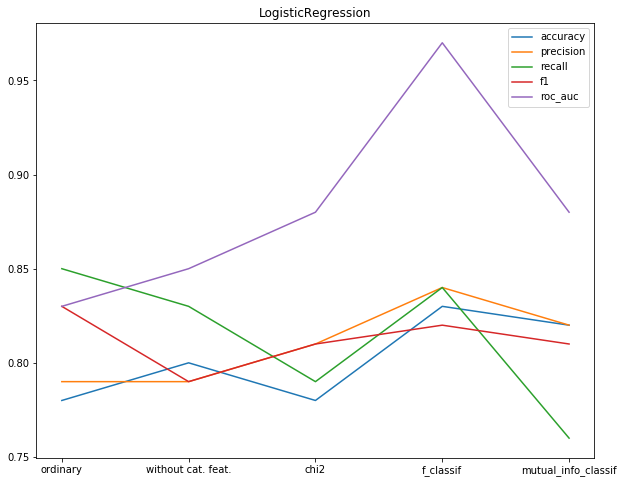

In [153]:
figLR, axLR = plt.subplots(figsize = (10,8))
line1 = axLR.plot(names, AccLR, label = 'accuracy')
line2 = axLR.plot(names, PrecLR, label = 'precision')
line3 = axLR.plot(names, RecLR, label = 'recall')
line4 = axLR.plot(names, F1LR, label = 'f1')
line5 = axLR.plot(names, ROC_AUCLR, label = 'roc_auc')
axLR.legend()
axLR.set_title('LogisticRegression')


Text(0.5, 1.0, 'RandomForest')

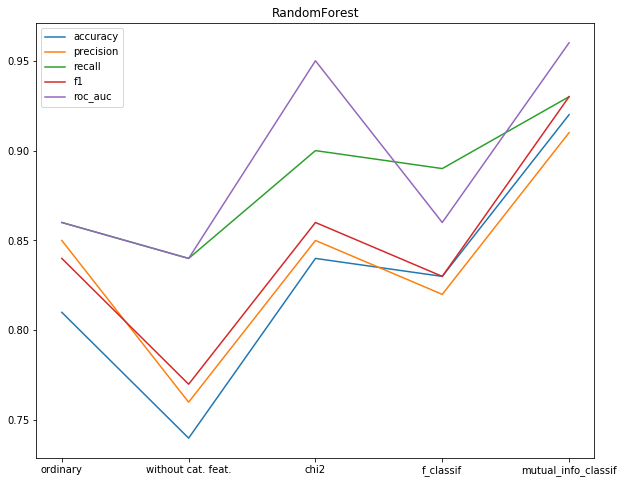

In [154]:
figRF, axRF = plt.subplots(figsize = (10,8))
line1 = axRF.plot(names, AccRF, label = 'accuracy')
line2 = axRF.plot(names, PrecRF, label = 'precision')
line3 = axRF.plot(names, RecRF, label = 'recall')
line4 = axRF.plot(names, F1RF, label = 'f1')
line5 = axRF.plot(names, ROC_AUCRF, label = 'roc_auc')
axRF.legend()
axRF.set_title('RandomForest')


Text(0.5, 1.0, 'GradientBoosting')

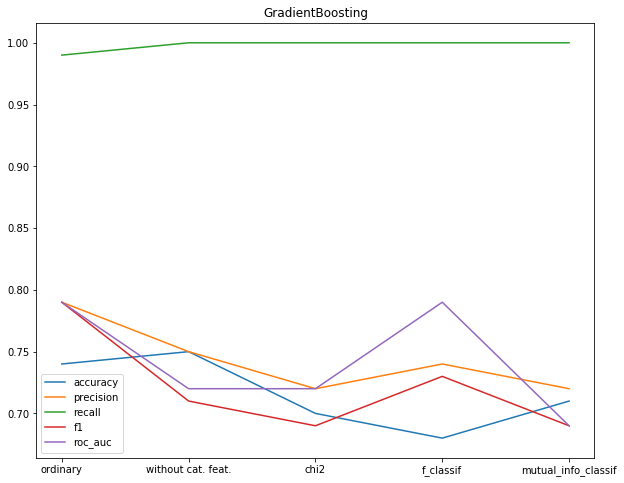

In [155]:
figGB, axGB = plt.subplots(figsize = (10,8))
line1 = axGB.plot(names, AccGB, label = 'accuracy')
line2 = axGB.plot(names, PrecGB, label = 'precision')
line3 = axGB.plot(names, RecGB, label = 'recall')
line4 = axGB.plot(names, F1GB, label = 'f1')
line5 = axGB.plot(names, ROC_AUCGB, label = 'roc_auc')
axGB.legend()
axGB.set_title('GradientBoosting')


#### Градиентный бустинг проигрывает случайному лесу. Вероятно, это обуславливается малым размером выборки. Поскольку случайный лес оказался наилучшим алгоритмом (в смысле используемых выше метрик) и наилучшее качество достигается при score_func = mutual_info_classif, попробуем "покрутить" параметр k в SelectKBest с score_func = mutual_info_classif именно для него. 

In [167]:
# Что ж, придётся подождать.
gridRFKBest =  {'n_estimators': range(50, 251, 5) }
qual = []
for metric in metrics:
    print(metric)
    for k in range(1, 28):
        print(k)
        X_kBest = SelectKBest(mutual_info_classif, k=k).fit_transform(newdata, data['target'])
        X_train, X_test, y_train, y_test = train_test_split(X_kBest, data['target'], test_size=0.33)
        gs = GridSearchCV(RF, gridRFKBest, scoring=metric, cv=gensplit)
        gs.fit(X_train, y_train)
        qual.append(np.mean(cross_val_score(ExtraTreesClassifier(bootstrap = True, n_estimators = gs.best_params_['n_estimators']),
                                  X_test, y_test, cv=gensplit, scoring=metric)))

accuracy
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
recall
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
precision
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
f1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
roc_auc
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


Text(0.5, 1.0, 'GradientBoosting with KBest')

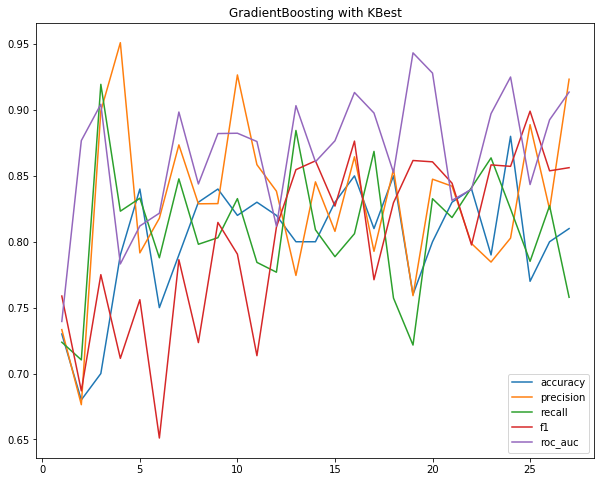

In [183]:
figRFKBest, axRFKBest = plt.subplots(figsize = (10,8))
ks = [i for i in range(1,28)]
line1 = axRFKBest.plot(ks, qual[:27], label = 'accuracy')
line2 = axRFKBest.plot(ks, qual[27:54], label = 'precision')
line3 = axRFKBest.plot(ks, qual[54:81], label = 'recall')
line4 = axRFKBest.plot(ks, qual[81:108], label = 'f1')
line5 = axRFKBest.plot(ks, qual[108:], label = 'roc_auc')
axRFKBest.legend()
axRFKBest.set_title('GradientBoosting with KBest')


### 6. Возможные применения

### 7. Рекомендации "на будущее".